In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\LoanData.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [7]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [9]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [11]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [12]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [13]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
df["ApplicantIncome"].value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [16]:
df["CoapplicantIncome"].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [17]:
df["LoanAmount"].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [18]:
df["Loan_Amount_Term"].unique()


array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [19]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [21]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [22]:
df["Credit_History"]=df["Credit_History"].replace({0:"bad",1:"good"})

In [23]:
df["Credit_History"].unique()

array(['good', 'bad', nan], dtype=object)

In [24]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [25]:
df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [26]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [27]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [28]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
continous=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
discrete_categorical=["Gender","Married","Education","Education","Self_Employed","Credit_History","Loan_Status"]
discrete_count=["Dependents","Property_Area","Loan_Amount_Term"]

# Exploratory Data Analysis (EDA)

In [30]:
df[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


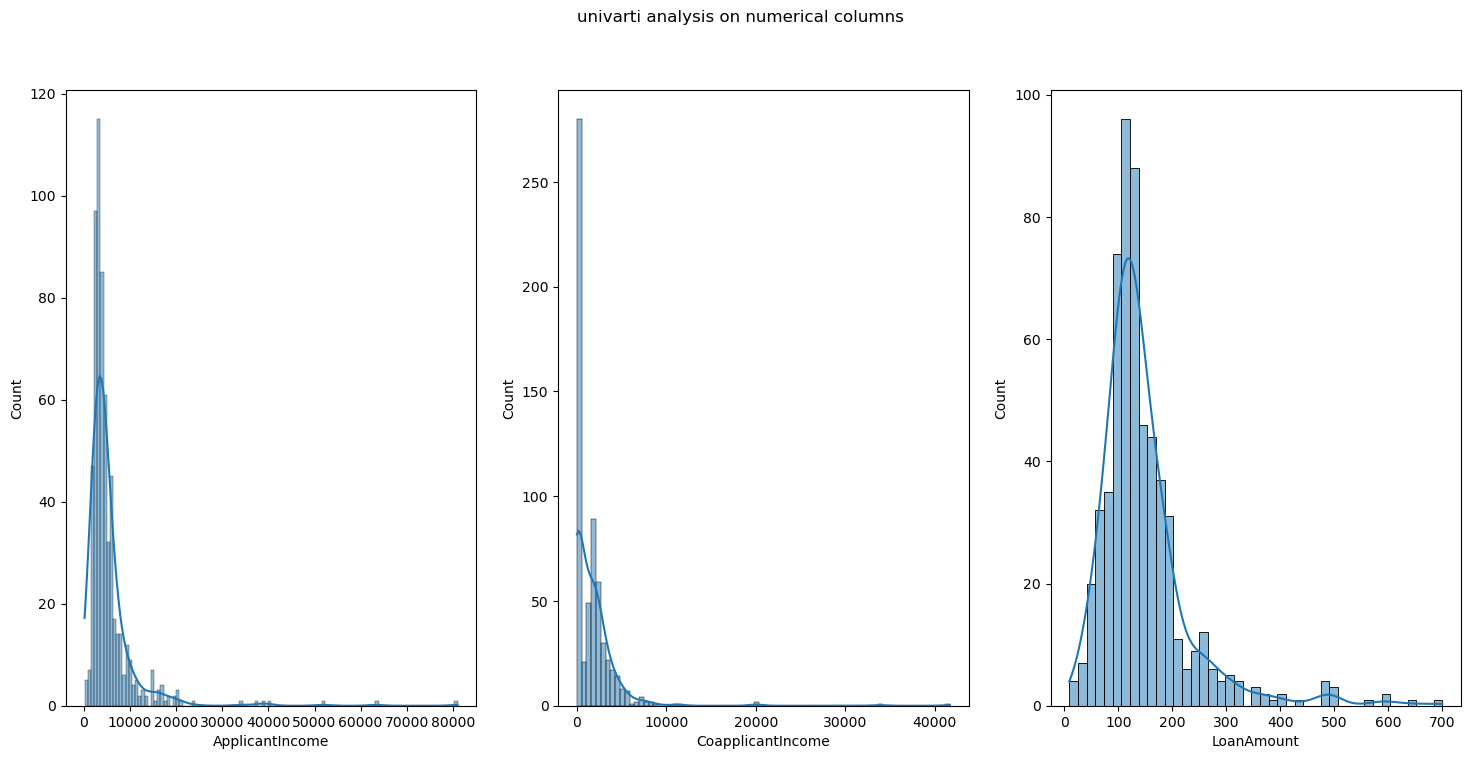

In [31]:
plt.rcParams['figure.figsize']=(18,8)


plt.subplot(1,3,1)
sns.histplot(df["ApplicantIncome"],kde=True)

plt.subplot(1,3,2)
sns.histplot(df["CoapplicantIncome"],kde=True)


plt.subplot(1,3,3)
sns.histplot(df["LoanAmount"],kde=True)
plt.suptitle("univarti analysis on numerical columns")
plt.show()

<Axes: >

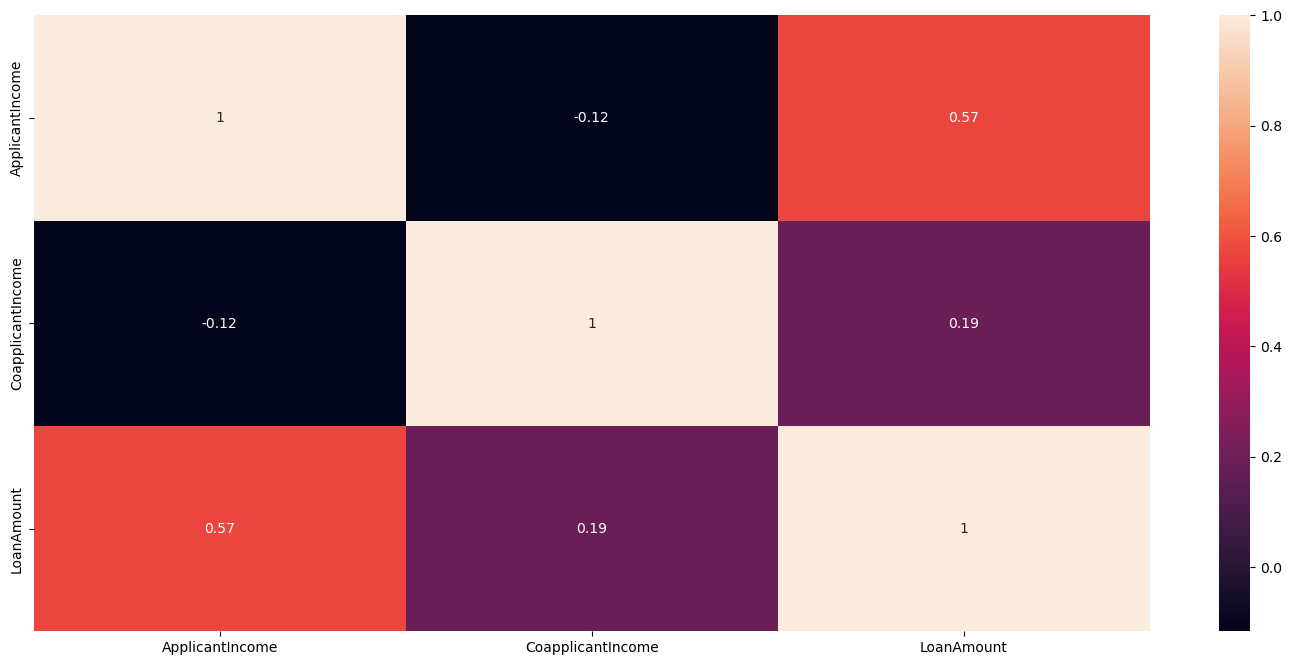

In [32]:
sns.heatmap(df[continous].corr(),annot=True)

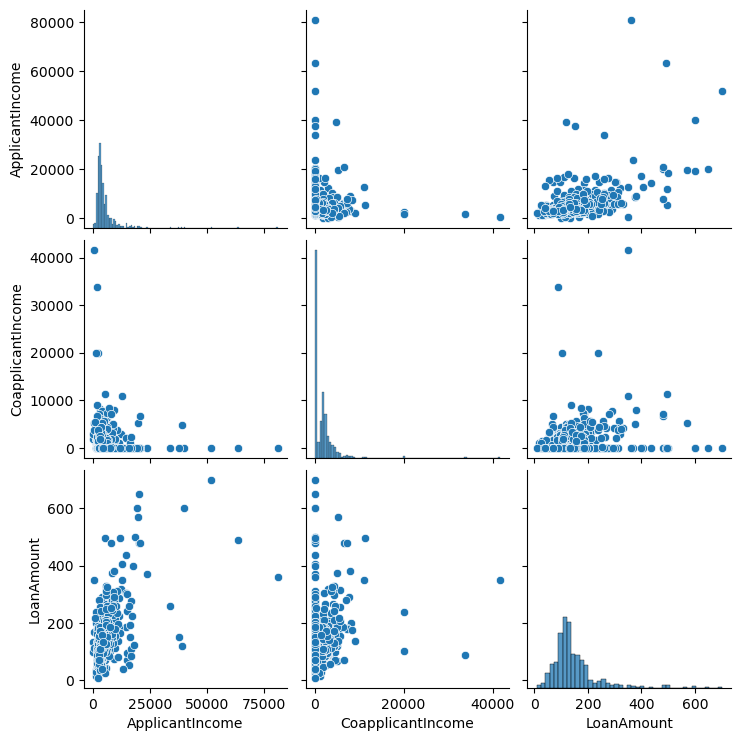

In [33]:
sns.pairplot(df[continous])

<Axes: >

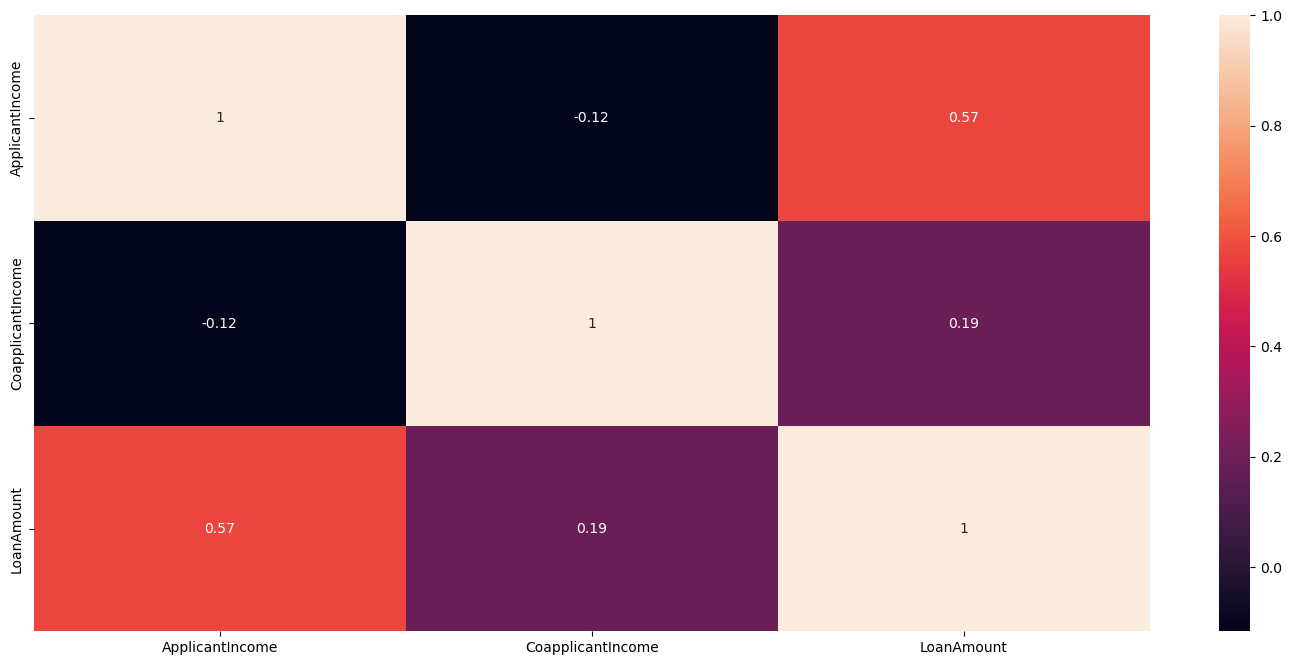

In [34]:
sns.heatmap(df[continous].corr(),annot=True)

In [35]:
df[discrete_categorical].describe()

,Gender,Married,Education,Education,Self_Employed,Credit_History,Loan_Status
count,601,611,614,614,582,564,614
unique,2,2,2,2,2,2,2
top,Male,Yes,Graduate,Graduate,No,good,Y
freq,489,398,480,480,500,475,422


<Axes: >

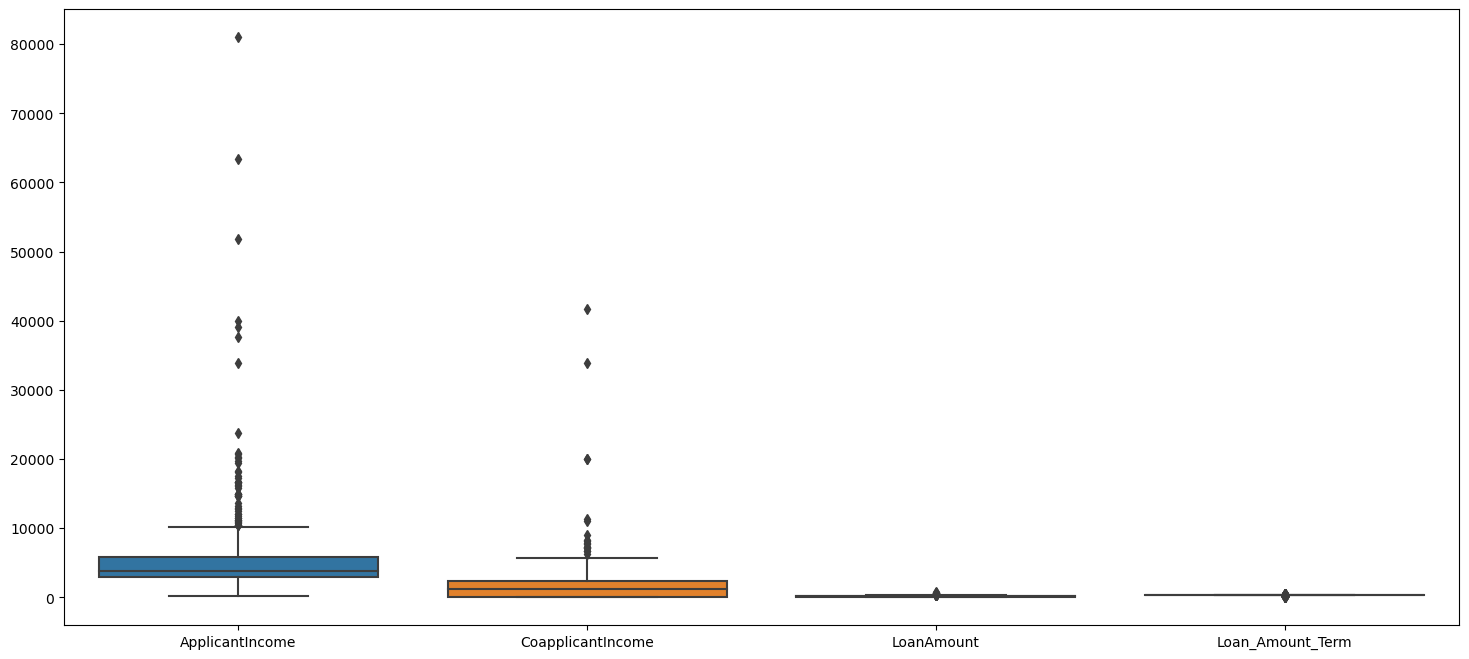

In [36]:
sns.boxplot(df)

# Data Preparation

In [37]:
continous

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [38]:
df["Income"]=df["ApplicantIncome"]+df["CoapplicantIncome"]
df.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)

In [39]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Income'],
      dtype='object')

In [40]:
df.isnull().sum()

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [41]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [42]:
df["Dependents"]=df["Dependents"].replace({"3+":3})

In [43]:
df=df.dropna(subset=["Income","LoanAmount","Loan_Amount_Term","Credit_History"])

In [44]:
df["Loan_Amount_Term"].isnull().sum()

0

In [45]:
df["Dependents"].value_counts()

0    295
2     92
1     85
3     45
Name: Dependents, dtype: int64

In [46]:
df["Dependents"]=df["Dependents"].fillna(0)

In [47]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [48]:
df.isnull().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

In [49]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,good,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,good,Urban,Y,3000.0


In [50]:
df.drop(columns=["Loan_ID"],inplace=True)

In [51]:
df.shape

(529, 11)

In [52]:
df["Gender"]=df["Gender"].map({"Male":1,"Female":0}).astype("int")
df["Married"]=df["Married"].map({"Yes":1,"No":0}).astype("int")
df["Education"]=df["Education"].map({"Graduate":1,"Not Graduate":0}).astype("int")
df["Self_Employed"]=df["Self_Employed"].map({"Yes":1,"No":0}).astype("int")
df["Credit_History"]=df["Credit_History"].map({"good":1,"bad":0}).astype("int")
df["Property_Area"]=df["Property_Area"].map({"Rural":0,"Semiurban":1,"Urban":2}).astype("int")
df["Loan_Status"]=df["Loan_Status"].map({"Y":1,"N":0}).astype("int")

In [53]:
df["Dependents"]=df["Dependents"].astype("int")
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].astype("int")

In [54]:
df[["Income","LoanAmount"]].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

In [55]:
from scipy.stats import boxcox
df["Income"],a=boxcox(df["Income"])
df["LoanAmount"],c=boxcox(df["LoanAmount"])
df[["Income","LoanAmount"]].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [56]:
df.keys()

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Income'],
      dtype='object')

In [57]:
X=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=True)

# Logistic Regresssion

In [59]:
#modelling
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)

LogisticRegression()

In [60]:
#Prediction on Train data and Test data
ypred_train=model_lr.predict(x_train)
ypred_test=model_lr.predict(x_test)

In [61]:
#Evaluation Metrics
from sklearn.metrics import accuracy_score
print("Train_acc:",accuracy_score(ypred_train,y_train))
print("Test_acc:",accuracy_score(ypred_test,y_test))

Train_acc: 0.806146572104019
Test_acc: 0.839622641509434


In [62]:
#Cross Validation score
from sklearn.model_selection import cross_val_score
print("cross_val_score:",cross_val_score(model_lr,x_train,y_train,cv=5).mean())

cross_val_score: 0.803781512605042


# K-Nearest Neighbors

In [63]:
#Hyper Parameters Tuning
from sklearn.neighbors import KNeighborsClassifier

estimator=KNeighborsClassifier()
params={"n_neighbors":list(range(0,10))}

from sklearn.model_selection import GridSearchCV

model_grid=GridSearchCV(estimator,params,cv=5,scoring="accuracy")

model_grid.fit(x_train,y_train)
model_grid.best_estimator_ 


KNeighborsClassifier(n_neighbors=8)

In [64]:
#KNN model with Best Hyper Parameter
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=8)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [65]:
#Prediction on train data ana test data
ypred_train=knn_model.predict(x_train)
ypred_test=knn_model.predict(x_test)

In [66]:
#Evaluation
from sklearn.metrics import accuracy_score
print("Train_acc:",accuracy_score(ypred_train,y_train))
print("Test_acc:",accuracy_score(ypred_test,y_test))

#Cross Validation score
from sklearn.model_selection import cross_val_score
print("cross_val_score:",cross_val_score(knn_model,x_train,y_train,cv=5).mean())

Train_acc: 0.7919621749408984
Test_acc: 0.7264150943396226
cross_val_score: 0.7352100840336135


# SVM

In [67]:
# Hyper Parameter 
from sklearn.svm import SVC
estimator=SVC()
params={"C":[0.01,0.1],"kernel":["linear","rbf","sigmoid","poly"]}

from sklearn.model_selection  import GridSearchCV
model_svc=GridSearchCV(estimator,params,cv=5,scoring="accuracy")

model_svc.fit(x_train,y_train)
model_svc.best_estimator_

#Modelling
from sklearn.svm import SVC
model_svc=SVC(C=1.0,kernel='rbf')
model_svc.fit(x_train,y_train)

#Prediction on train data ana test data
ypred_train=model_svc.predict(x_train)
ypred_test=model_svc.predict(x_test)

#Evaluation
from sklearn.metrics import accuracy_score
print("Train_acc:",accuracy_score(ypred_train,y_train))
print("Test_acc:",accuracy_score(ypred_test,y_test))

#Cross Validation score
from sklearn.model_selection import cross_val_score
print("cross_val_score:",cross_val_score(model_svc,x_train,y_train,cv=5).mean())

Train_acc: 0.6832151300236406
Test_acc: 0.7264150943396226
cross_val_score: 0.6832212885154062


# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(random_state=True)
param={"criterion":["gini","entropy"],"max_depth":[1,2,3,4,5,6,7,8,9,10]}

from sklearn.model_selection import GridSearchCV
model_dc=GridSearchCV(estimator,param,cv=5,scoring="accuracy")
model_dc.fit(x_train,y_train)
dt=model_dc.best_estimator_
dt

DecisionTreeClassifier(max_depth=1, random_state=True)

In [69]:
dtc=dt.feature_importances_
dtc

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [70]:
index=[i for i,x in enumerate(dtc) if x>0]

In [71]:
x_train_dc=x_train.iloc[:,index]
x_test_dc=x_test.iloc[:,index]

In [72]:
dt.fit(x_train_dc,y_train)

DecisionTreeClassifier(max_depth=1, random_state=True)

In [73]:
ypred_train=dt.predict(x_train_dc)
ypred_test=dt.predict(x_test_dc)


In [74]:
from sklearn.metrics import accuracy_score
print("Train_acc:",accuracy_score(ypred_train,y_train))
print("Test_acc:",accuracy_score(ypred_test,y_test))
from sklearn.model_selection import cross_val_score
print("cv_score:",cross_val_score(dt,x_train_dc,y_train,cv=5,scoring="accuracy").mean())

Train_acc: 0.8085106382978723
Test_acc: 0.839622641509434
cv_score: 0.8084873949579832


In [75]:
model_dc.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=True)

# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
estimator=RandomForestClassifier()
param={"n_estimators":list(range(1,50))}
from sklearn.model_selection import GridSearchCV
model_rf=GridSearchCV(estimator,param,cv=5,scoring="accuracy")
model_rf.fit(x_train,y_train)
rf=model_rf.best_estimator_

In [77]:
rf

RandomForestClassifier(n_estimators=25)

In [78]:
df_rf=rf.feature_importances_
df_rf

array([0.01950971, 0.02645088, 0.04868781, 0.02488631, 0.01939217,
       0.23248391, 0.05151271, 0.26388179, 0.06141395, 0.25178077])

In [79]:
index=[i for i,x in enumerate(df_rf) if x>0]

In [80]:
x_train_df=x_train.iloc[:,index]
x_test_df=x_test.iloc[:,index]

In [81]:
rf.fit(x_train_df,y_train)

RandomForestClassifier(n_estimators=25)

In [82]:
ypred_train=rf.predict(x_train_df)
ypred_test=rf.predict(x_test_df)

In [84]:
from sklearn.metrics import accuracy_score
print("Train_acc:",accuracy_score(ypred_train,y_train))
print("Test_acc:",accuracy_score(ypred_test,y_test))
from sklearn.model_selection import cross_val_score
print("cv_score:",cross_val_score(rf,x_train_df,y_train,cv=5,scoring="accuracy").mean())

Train_acc: 0.9976359338061466
Test_acc: 0.8018867924528302
cv_score: 0.7894957983193278
